<a href="https://colab.research.google.com/github/ykjoy/ML/blob/main/dunnhumby_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dunnhumby 데이터를 이용한 classificaion

# 데이터 전처리 (Data Preprocessing)



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_demo = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BA2023/dunnhumby/hh_demographic.csv")
df_couponred = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BA2023/dunnhumby/coupon_redempt.csv")
df_campaign = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BA2023/dunnhumby/campaign_table.csv")

#df_trans = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BA2023/dunnhumby/transaction_data.csv")
#df_cause = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BA2023/dunnhumby/causal_data.csv")
#df_coupon = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BA2023/dunnhumby/coupon.csv")
#df_product = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BA2023/dunnhumby/product.csv")
#df_campaign_desc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BA2023/dunnhumby/campaign_desc.csv")

In [ ]:
display(df_campaign.shape) # 행열
display(df_campaign.info()) # 데이터타입, null정보등 확인
display(df_campaign.isna().sum()) # 결측치 수
display(df_campaign.tail())
display(len(df_campaign.household_key.unique()))
display(len(df_campaign.DESCRIPTION.unique()))
display(len(df_campaign.CAMPAIGN.unique()))
g = df_campaign.groupby('DESCRIPTION')['CAMPAIGN'].nunique()
g.head()

(7208, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


None

DESCRIPTION      0
household_key    0
CAMPAIGN         0
dtype: int64

,DESCRIPTION,household_key,CAMPAIGN
7203,TypeC,1803,15
7204,TypeC,1082,15
7205,TypeC,942,15
7206,TypeC,855,15
7207,TypeC,334,15


1584

3

30

DESCRIPTION
TypeA     5
TypeB    19
TypeC     6
Name: CAMPAIGN, dtype: int64

In [ ]:
display(df_couponred.shape) # 행열
display(df_couponred.info()) # 데이터타입, null정보등 확인
display(df_couponred.isna().sum()) # 결측치 수
display(df_couponred.tail())

(2318, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


None

household_key    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

,household_key,DAY,COUPON_UPC,CAMPAIGN
2313,2496,592,54900050076,18
2314,2496,610,55100000013,18
2315,2500,449,53663200076,8
2316,2500,449,54300031076,8
2317,2500,624,55000013950,18


In [ ]:
display(df_demo.shape) # 행열
display(df_demo.info()) # 데이터타입, null정보등 확인
display(df_demo.isna().sum()) # 결측치 수
display(df_demo.head())

(801, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


None

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
household_key          0
dtype: int64

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


## 파일 merge
df_merged = df_couponred + df_campaign    
grouped by ['household_key', 'CAMPAIGN']   
df_two = grouped + df_demo

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
df_merged = df_couponred.merge(df_campaign, how = 'right', on=['household_key','CAMPAIGN'])

display(df_merged.shape) # 행열
display(df_merged.info()) # 데이터타입, null정보등 확인
display(df_merged.isna().sum()) # 결측치 수
display(len(df_merged.household_key.unique()))

df_merged = df_merged.drop(['DAY'], axis=1)
df_merged['COUPON_UPC'] = df_merged['COUPON_UPC'].notnull().astype(int)
df_merged = df_merged[df_merged['DESCRIPTION'] == 'TypeA']

display(df_merged.info()) # 데이터타입, null정보등 확인
display(df_merged.head())

(8637, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8637 entries, 0 to 8636
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   household_key  8637 non-null   int64  
 1   DAY            2318 non-null   float64
 2   COUPON_UPC     2318 non-null   float64
 3   CAMPAIGN       8637 non-null   int64  
 4   DESCRIPTION    8637 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 404.9+ KB


None

household_key       0
DAY              6319
COUPON_UPC       6319
CAMPAIGN            0
DESCRIPTION         0
dtype: int64

1584

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5135 entries, 0 to 5134
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   household_key  5135 non-null   int64 
 1   COUPON_UPC     5135 non-null   int64 
 2   CAMPAIGN       5135 non-null   int64 
 3   DESCRIPTION    5135 non-null   object
dtypes: int64(3), object(1)
memory usage: 200.6+ KB


None

,household_key,COUPON_UPC,CAMPAIGN,DESCRIPTION
0,17,0,26,TypeA
1,27,0,26,TypeA
2,212,0,26,TypeA
3,208,0,26,TypeA
4,192,0,26,TypeA


In [ ]:
grouped = df_merged.groupby(['household_key', 'CAMPAIGN'])['COUPON_UPC'].sum().reset_index()
grouped['COUPON_YES'] = (grouped['COUPON_UPC'] > 0).astype(int)
grouped.head()

,household_key,CAMPAIGN,COUPON_UPC,COUPON_YES
0,1,8,3,1
1,1,13,0,0
2,1,18,2,1
3,2,18,0,0
4,3,8,0,0


In [ ]:
df_two = grouped.merge(df_demo, how = 'inner', on='household_key')
display(df_two.shape) # 행열
display(df_two.info()) # 데이터타입, null정보등 확인
display(df_two.isna().sum()) # 결측치 수
display(len(df_two.household_key.unique()))
display(df_two.head())

(2179, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 0 to 2178
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   household_key        2179 non-null   int64 
 1   CAMPAIGN             2179 non-null   int64 
 2   COUPON_UPC           2179 non-null   int64 
 3   COUPON_YES           2179 non-null   int64 
 4   AGE_DESC             2179 non-null   object
 5   MARITAL_STATUS_CODE  2179 non-null   object
 6   INCOME_DESC          2179 non-null   object
 7   HOMEOWNER_DESC       2179 non-null   object
 8   HH_COMP_DESC         2179 non-null   object
 9   HOUSEHOLD_SIZE_DESC  2179 non-null   object
 10  KID_CATEGORY_DESC    2179 non-null   object
dtypes: int64(4), object(7)
memory usage: 204.3+ KB


None

household_key          0
CAMPAIGN               0
COUPON_UPC             0
COUPON_YES             0
AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
dtype: int64

741

,household_key,CAMPAIGN,COUPON_UPC,COUPON_YES,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,1,8,3,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,1,13,0,0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
2,1,18,2,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
3,7,18,0,0,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
4,8,8,1,1,25-34,U,25-34K,Unknown,2 Adults Kids,3,1


## 데이터 기초 통계

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')
df_two.describe()

,household_key,CAMPAIGN,COUPON_UPC,COUPON_YES
count,2179.00,2179.00,2179.00,2179.00
mean,1222.32,15.54,0.66,0.22
std,738.28,6.64,1.62,0.42
min,1.00,8.00,0.00,0.00
25%,583.00,8.00,0.00,0.00
50%,1172.00,13.00,0.00,0.00
75%,1911.00,18.00,0.00,0.00
max,2499.00,30.00,17.00,1.00


In [ ]:
df_two.describe(include="object")

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
count,2179,2179,2179,2179,2179,2179,2179
unique,6,3,12,5,6,5,4
top,45-54,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
freq,771,931,546,1354,701,871,1542


## 범주형 변수의 수치화

In [ ]:
age_mapping = lambda x: {'65+': 6, '55-64': 5, '45-54': 4, '35-44': 3, '25-34': 2, '19-24': 1}.get(x, x)
# Use the apply method to create a new column 'AGE_DESC2'
df_two['AGE_DESC2'] = df_two['AGE_DESC'].apply(age_mapping)

df_two['MARITAL_STATUS_CODE2'] = df_two['MARITAL_STATUS_CODE'].apply(lambda x: 1 if x == 'B' else 0)
df_two['HOMEOWNER_DESC2'] = df_two['HOMEOWNER_DESC'].apply(lambda x: 1 if x == 'Homeowner' else 0)

income_mapping = lambda x: {'Under 15K':1, '15-24K':2, '25-34K':3, '35-49K': 4, '50-74K':5,  '75-99K': 6,
                            '100-124K':7, '125-149K':8,'150-174K':9, '175-199K':10,'200-249K':11,'250K+':12 }.get(x, x)
df_two['INCOME_DESCC2'] = df_two['INCOME_DESC'].apply(income_mapping)

size_mapping = lambda x: {'5+': 5, '4': 4, '3': 3, '2': 2, '1': 1}.get(x, x)
df_two['HOUSEHOLD_SIZE_DESC2'] = df_two['HOUSEHOLD_SIZE_DESC'].apply(size_mapping)

kid_mapping = lambda x: {'3+': 4, '2': 3, '1': 2, 'None/Unknown': 1}.get(x, x)
df_two['KID_CATEGORY_DESC2'] = df_two['KID_CATEGORY_DESC'].apply(kid_mapping)


<ipython-input-17-81b95b0fa339>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_two.corr()


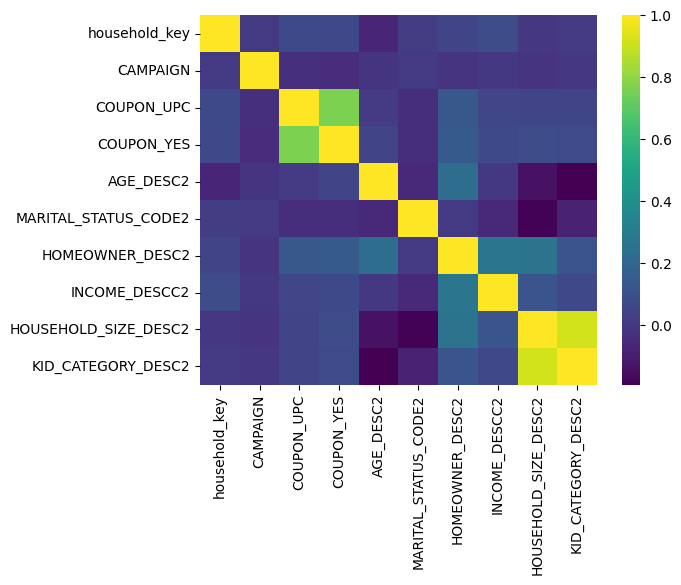

In [ ]:
corr = df_two.corr()
sns.heatmap(corr, cmap='viridis')
plt.show()

## Campaign 데이터의 더미변수화

In [ ]:
# 'CAMPAIGN' 열의 더미 변수를 생성합니다.
df_dummies = pd.get_dummies(df_two['CAMPAIGN'], prefix='Campaign')  #drop_first=True
df_two = pd.concat([df_two, df_dummies], axis=1)


In [ ]:
df_two.describe()

,household_key,CAMPAIGN,COUPON_UPC,COUPON_YES,AGE_DESC2,MARITAL_STATUS_CODE2,HOMEOWNER_DESC2,INCOME_DESCC2,HOUSEHOLD_SIZE_DESC2,KID_CATEGORY_DESC2,Campaign_8,Campaign_13,Campaign_18,Campaign_26,Campaign_30
count,2179.00,2179.00,2179.00,2179.00,2179.00,2179.00,2179.00,2179.00,2179.00,2179.00,2179.00,2179.00,2179.00,2179.00,2179.00
mean,1222.32,15.54,0.66,0.22,3.48,0.15,0.62,4.71,2.16,1.52,0.27,0.28,0.30,0.08,0.08
std,738.28,6.64,1.62,0.42,1.27,0.36,0.49,2.28,1.17,0.94,0.44,0.45,0.46,0.27,0.27
min,1.00,8.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,583.00,8.00,0.00,0.00,3.00,0.00,0.00,3.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,1172.00,13.00,0.00,0.00,4.00,0.00,1.00,5.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,1911.00,18.00,0.00,0.00,4.00,0.00,1.00,6.00,3.00,2.00,1.00,1.00,1.00,0.00,0.00
max,2499.00,30.00,17.00,1.00,6.00,1.00,1.00,12.00,5.00,4.00,1.00,1.00,1.00,1.00,1.00


# 데이터 시각화

## Campaign별로 쿠폰을 받은 Household 수

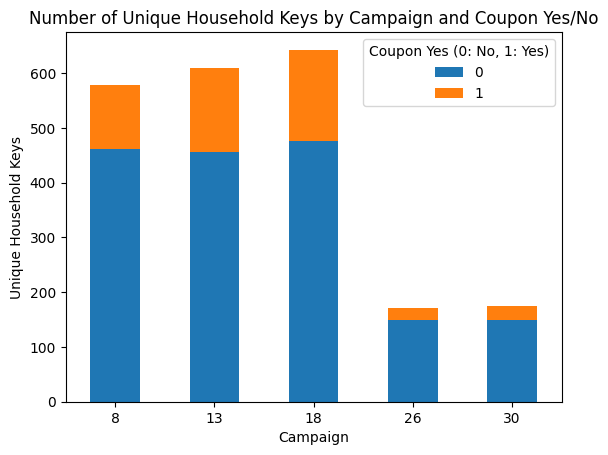

In [ ]:
campaign_coupon_counts = df_two.groupby(['CAMPAIGN', 'COUPON_YES'])['household_key'].nunique().unstack()
campaign_coupon_counts.plot(kind='bar', stacked=True)
plt.xlabel('Campaign')
plt.ylabel('Unique Household Keys')
plt.title('Number of Unique Household Keys by Campaign and Coupon Yes/No')
plt.legend(title='Coupon Yes (0: No, 1: Yes)', loc='upper right')
plt.xticks(rotation=0)
plt.show()

## 쿠폰 사용여부에 따른 Household 수

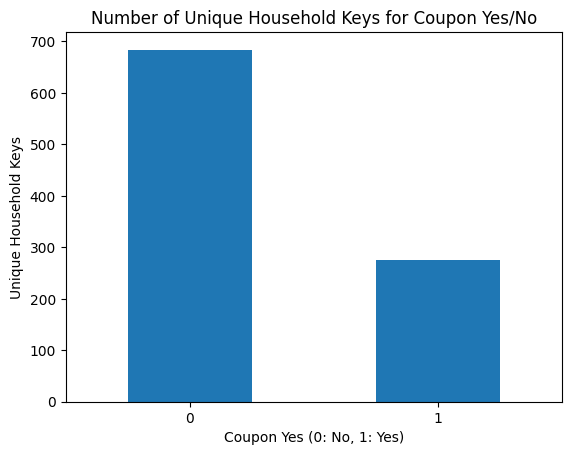

In [ ]:
coupon_yes_counts = df_two.groupby('COUPON_YES')['household_key'].nunique()
coupon_yes_counts.plot(kind='bar')
plt.xlabel('Coupon Yes (0: No, 1: Yes)')
plt.ylabel('Unique Household Keys')
plt.title('Number of Unique Household Keys for Coupon Yes/No')
plt.xticks(rotation=0)
plt.show()

## 사용 쿠폰 갯수에 따른 Household 수

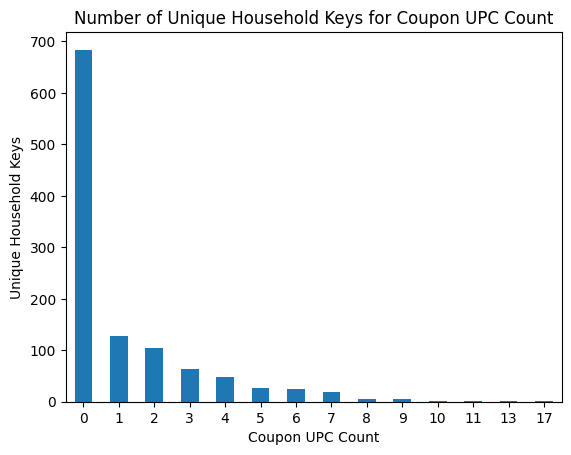

In [ ]:
coupon_upc_counts = df_two.groupby('COUPON_UPC')['household_key'].nunique()
coupon_upc_counts.plot(kind='bar')
plt.xlabel('Coupon UPC Count')
plt.ylabel('Unique Household Keys')
plt.title('Number of Unique Household Keys for Coupon UPC Count')
plt.xticks(rotation=0)
plt.show()

# 분류 (Classification) : COUPON_YES

## 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_two[['AGE_DESC2','MARITAL_STATUS_CODE2','HOMEOWNER_DESC2','INCOME_DESCC2','HOUSEHOLD_SIZE_DESC2','KID_CATEGORY_DESC2','Campaign_13','Campaign_18','Campaign_26','Campaign_30']]
y = df_two['COUPON_YES']   # target 변수

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.783
시험용 데이터 정확도: 0.767


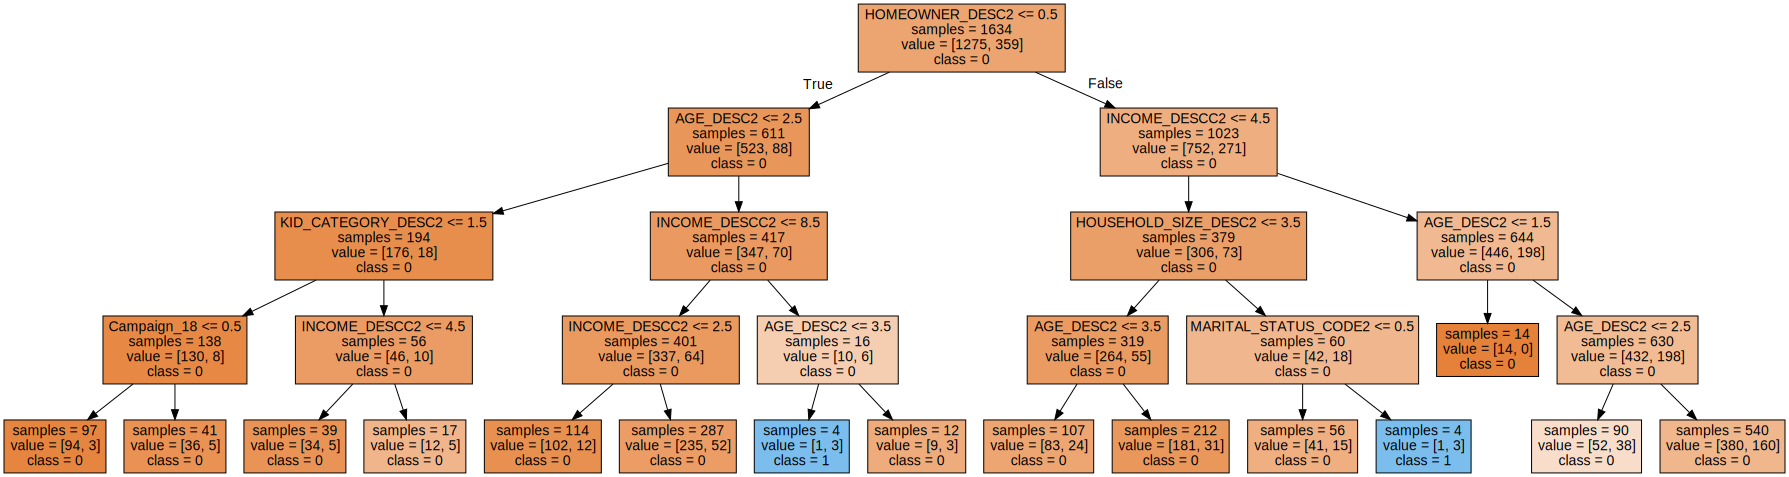

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=["0","1"],
                feature_names=['AGE_DESC2','MARITAL_STATUS_CODE2','HOMEOWNER_DESC2','INCOME_DESCC2','HOUSEHOLD_SIZE_DESC2','KID_CATEGORY_DESC2','Campaign_13','Campaign_18','Campaign_26','Campaign_30'],
                impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))



In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.09821925 0.00981587 0.10459136 0.37520466 0.07044407 0.01197533
 0.         0.         0.15995266 0.1697968 ]


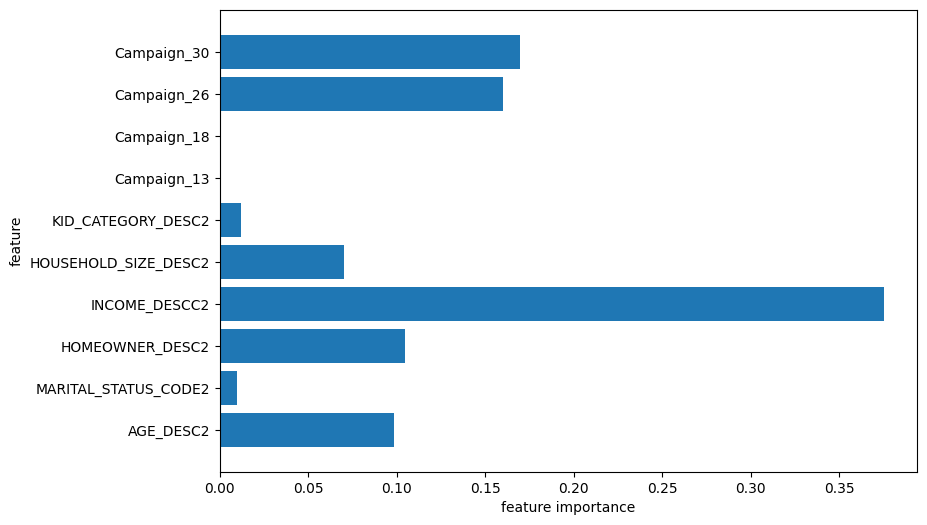

In [ ]:
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(['AGE_DESC2','MARITAL_STATUS_CODE2','HOMEOWNER_DESC2','INCOME_DESCC2','HOUSEHOLD_SIZE_DESC2','KID_CATEGORY_DESC2','Campaign_13','Campaign_18','Campaign_26','Campaign_30'])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ['AGE_DESC2','MARITAL_STATUS_CODE2','HOMEOWNER_DESC2','INCOME_DESCC2','HOUSEHOLD_SIZE_DESC2','KID_CATEGORY_DESC2','Campaign_13','Campaign_18','Campaign_26','Campaign_30'])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정

plot_feature_importances_wisc(tree)

## SMOTE for Imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Apply SMOTE to balance the data
smote = SMOTE(sampling_strategy=0.5, random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(y_train.mean())
print(y_resampled.mean())


0.2197062423500612
0.3331589958158996


In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
#tree.fit(X_train, y_train)
tree.fit(X_resampled, y_resampled)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.775
시험용 데이터 정확도: 0.767


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

tree_pred = tree.predict(X_test)
print("Confution matrix (Decision Treet):")
print(confusion_matrix(y_test, tree_pred))
print("Classification report (Decision Tree):")
print(classification_report(y_test, tree_pred, target_names=["No", "Yes"]))

Confution matrix (Decision Treet):
[[413   7]
 [120   5]]
Classification report (Decision Tree):
              precision    recall  f1-score   support

          No       0.77      0.98      0.87       420
         Yes       0.42      0.04      0.07       125

    accuracy                           0.77       545
   macro avg       0.60      0.51      0.47       545
weighted avg       0.69      0.77      0.68       545



## XGBoost Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[3,4,5], 'learning_rate':[0.2, 0.15, 0.1,0.08, 0.06, 0.04, 0.02]}

# param_grid의 파라미터들을 5개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습
init_xgb = XGBClassifier(random_state=0)
grid_xgb = GridSearchCV(init_xgb, param_grid=parameters, cv=5, refit=True)
print(grid_xgb)
# 파라미터들을 순차적으로 학습, 검증
#grid_xgb.fit(X_train, y_train)
grid_xgb.fit(X_resampled, y_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.2, 0.15, 0.1, 0.08, 0.06, 0.04,
                                           0.02],
                         'max_depth': [3, 4, 5]})

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_xgb.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_xgb.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.15, 'max_depth': 5}
GridSearchCV 최고 정확도: 0.6941


In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_xgb.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.705


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

grid_xgb_pred = grid_xgb.predict(X_test)
print("Confution matrix (XGBoost):")
print(confusion_matrix(y_test, grid_xgb_pred))
print("Classification report (XGBoost):")
print(classification_report(y_test, grid_xgb_pred, target_names=["No", "Yes"]))

Confution matrix (XGBoost):
[[361  59]
 [102  23]]
Classification report (XGBoost):
              precision    recall  f1-score   support

          No       0.78      0.86      0.82       420
         Yes       0.28      0.18      0.22       125

    accuracy                           0.70       545
   macro avg       0.53      0.52      0.52       545
weighted avg       0.67      0.70      0.68       545

